# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [101]:
ds = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [102]:
ds.shape

(6362620, 11)

In [103]:
ds_sample = ds.sample(n=20000)

In [104]:
ds_sample.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2694719,211,PAYMENT,914.85,C1681832650,150661.47,149746.63,M1257249282,0.00,0.00,0,0
4660486,330,TRANSFER,191356.49,C1415816716,31004.00,0.00,C1323473914,358643.32,549999.81,0,0
618773,34,CASH_IN,18946.80,C1744989459,9934.10,28880.90,C1011295887,1530866.96,1362082.25,0,0
978594,44,CASH_OUT,10593.05,C1838483436,106544.00,95950.95,C1047473163,205805.95,216398.99,0,0
5906965,404,PAYMENT,15624.10,C1092178075,243521.90,227897.80,M26969067,0.00,0.00,0,0


In [105]:
ds_sample.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,20000.00000,20000.0
mean,243.788500,1.866760e+05,8.790366e+05,9.001952e+05,1.109187e+06,1.236058e+06,0.00155,0.0
std,142.456758,6.381819e+05,2.980011e+06,3.007243e+06,2.995106e+06,3.295485e+06,0.03934,0.0
min,1.000000,4.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
25%,156.000000,1.360941e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.0
50%,240.000000,7.457833e+04,1.456650e+04,0.000000e+00,1.356565e+05,2.157683e+05,0.00000,0.0
75%,334.000000,2.072729e+05,1.123605e+05,1.535548e+05,9.482955e+05,1.130423e+06,0.00000,0.0
max,725.000000,3.680803e+07,5.958504e+07,4.958504e+07,9.321428e+07,1.300223e+08,1.00000,0.0


In [106]:
#sns.pairplot(ds_sample)

### What is the distribution of the outcome? 

In [107]:
ds_sample.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

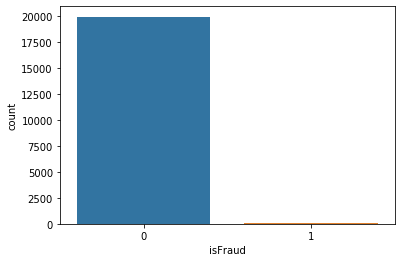

In [108]:
sns.countplot(ds_sample.isFraud)

In [109]:
isFraud_ds = ds_sample.loc[ds_sample['isFraud'] == 1]

In [110]:
size = isFraud_ds.shape[0]
notFraud_ds = ds_sample.loc[ds_sample['isFraud'] == 0].sample(n=size,random_state=42)

In [111]:
ds_undersample = pd.concat([isFraud_ds, notFraud_ds])

In [112]:
ds_undersample.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [113]:
ds_undersample.isFraud

338008     1
3960338    1
6281814    1
5996399    1
4541167    1
          ..
218464     0
3761924    0
3751143    0
3475419    0
3010575    0
Name: isFraud, Length: 62, dtype: int64

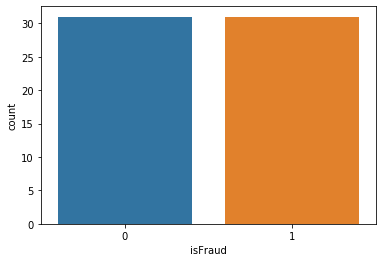

In [114]:
sns.countplot(ds_undersample.isFraud)

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [115]:
ds_undersample.drop('step', axis = 1, inplace = True)

In [116]:
ds_undersample.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
amount,1.000000,0.721054,0.556886,-0.049093,-0.001604,0.445557,NaN
oldbalanceOrg,0.721054,1.000000,0.976830,0.003761,-0.000040,0.169550,NaN
newbalanceOrig,0.556886,0.976830,1.000000,0.019832,0.000083,0.058033,NaN
oldbalanceDest,-0.049093,0.003761,0.019832,1.000000,0.984683,0.069342,NaN
newbalanceDest,-0.001604,-0.000040,0.000083,0.984683,1.000000,0.143047,NaN
isFraud,0.445557,0.169550,0.058033,0.069342,0.143047,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
ds_undersample.drop(['oldbalanceDest', 'isFlaggedFraud'], axis = 1, inplace = True)

In [118]:
ds_undersample = pd.get_dummies(data = ds_undersample, columns = ['type', 'nameOrig', 'nameDest'], drop_first = True)

In [120]:
ds_correlation = ds_undersample.corr()
mask = abs(ds_correlation >0.3)
ds_correlation[mask]

,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest,isFraud,type_CASH_OUT,type_PAYMENT,type_TRANSFER,nameOrig_C1058610480,nameOrig_C112132144,...,nameDest_C970796050,nameDest_C989949797,nameDest_C990923989,nameDest_M1116532894,nameDest_M1450315097,nameDest_M1514323601,nameDest_M1718061906,nameDest_M1738018399,nameDest_M893272804,nameDest_M984478758
amount,1.000000,0.721054,0.556886,NaN,0.445557,NaN,NaN,0.562447,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,0.721054,1.000000,0.976830,NaN,NaN,NaN,NaN,0.370872,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
newbalanceOrig,0.556886,0.976830,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
newbalanceDest,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isFraud,0.445557,NaN,NaN,NaN,1.000000,NaN,NaN,0.438529,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_CASH_OUT,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_PAYMENT,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.358895,...,NaN,NaN,NaN,0.358895,0.358895,0.358895,0.358895,0.358895,0.358895,0.358895
type_TRANSFER,0.562447,0.370872,NaN,NaN,0.438529,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nameOrig_C1058610480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nameOrig_C112132144,NaN,NaN,NaN,NaN,NaN,NaN,0.358895,NaN,NaN,1.000000,...,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
isFraud_ds = ds_sample.loc[ds_sample['isFraud'] == 1]

### Run a logisitc regression classifier and evaluate its accuracy.

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [161]:
target = ds_undersample.isFraud
data = ds_undersample.drop(['isFraud'], axis = 1)

In [162]:
data_train, data_test,target_train, target_test = train_test_split(data, target, test_size = 0.2, random_state=29)

In [164]:
lr = LogisticRegression()
lr.fit(data_train, target_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
acc = lr.score(data_test, target_test)*100
acc

84.61538461538461

### Now pick a model of your choice and evaluate its accuracy.

In [167]:
from sklearn.neighbors import KNeighborsClassifier

In [168]:
for i in range(2,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(data_train, target_train)
    acc = knn.score(data_test, target_test)*100
    print("For", i,":", acc)

For 2 : 53.84615384615385
For 3 : 53.84615384615385
For 4 : 53.84615384615385
For 5 : 53.84615384615385
For 6 : 46.15384615384615
For 7 : 46.15384615384615
For 8 : 46.15384615384615
For 9 : 46.15384615384615
For 10 : 46.15384615384615
For 11 : 46.15384615384615
For 12 : 46.15384615384615
For 13 : 53.84615384615385
For 14 : 53.84615384615385


### Which model worked better and how do you know?